In [5]:
import importlib
import dgl_runge_kutta
importlib.reload(dgl_runge_kutta)

<module 'dgl_runge_kutta' from '/Users/florian/dev/github.com/thecodinglab/hm-scripts/sympy/dgl_runge_kutta.py'>

In [6]:
import numpy as np
import dgl_runge_kutta as runge_kutta

f = lambda x, y: x / y

a = 2
b = 5
n = 1
y0 = 1

x_classic, y_classic = runge_kutta.classic(f, a, b, n, y0, print_steps=True)

#### Iteration 1

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [7]:
# Euler:
# intermediate_steps = 1
# previous_intermediate_weights = np.array([[0]])
# intermediate_weights = np.array([1])
# intermediate_step_factors = np.array([0])

# Mittelpunkt:
# intermediate_steps = 2
# previous_intermediate_weights = np.array([
#     [0, 0],
#     [0.5, 0]
# ])
# intermediate_weights = np.array([0, 1])
# intermediate_step_factors = np.array([0, 0.5])

# Modifiziertes Euler:
# intermediate_steps = 2
# previous_intermediate_weights = np.array([
#     [0, 0],
#     [1, 0]
# ])
# intermediate_weights = np.array([0.5, 0.5])
# intermediate_step_factors = np.array([0, 1])

# Runge-Kutta Klassisch:
# intermediate_steps = 4
# previous_intermediate_weights = np.array([
#     [0, 0, 0, 0],
#     [0.5, 0, 0, 0],
#     [0, 0.5, 0, 0],
#     [0, 0, 1, 0]
# ])
# intermediate_weights = np.array([
#     1 / 6, 1 / 3, 1 / 3, 1 / 6
# ])
# intermediate_step_factors = np.array([
#     0, 0.5, 0.5, 1
# ])

# Butcher Schema:
# c_1 | a_11 a_12 ... a_1s
# c_2 | a_21 a_22 ... a_2s
# ... | ...
# c_s | a_s1 a_s2 ... a_ss
# ----|--------------------
#     | b_1  b_2  ... b_s
butcher_tableau = np.array([
    [0, 0, 0, 0],
    [1/3, 1/3, 0, 0],
    [2/3, 0, 2/3, 0],
    [0, 1/4, 0, 3/4]
])

intermediate_steps = len(butcher_tableau) - 1
previous_intermediate_weights = butcher_tableau[:-1, 1:]
intermediate_weights = butcher_tableau[-1, 1:]
intermediate_step_factors = butcher_tableau[:-1, 0]

x_dynamic, y_dynamic = runge_kutta.dynamic(
    f, a, b, n, y0,
    intermediate_steps,             # s
    previous_intermediate_weights,  # a
    intermediate_weights,           # b
    intermediate_step_factors,      # c
    print_steps=True
)

#### Iteration 1

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

/var/folders/nv/4tyj2s692nl6v17z2q_htz5m0000gn/T/ipykernel_68959/157182374.py:4: RuntimeWarning: divide by zero encountered in divide
  f = lambda x, y: x / y


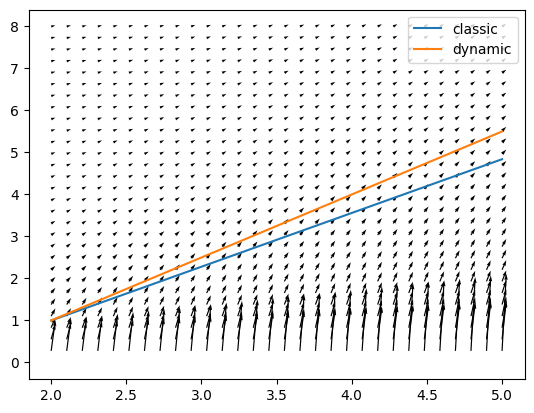

In [8]:
import matplotlib.pyplot as plt

x_min = a
x_max = b
y_min = 0
y_max = 8

count = 30
x, y = np.meshgrid(
    np.linspace(x_min, x_max, count),
    np.linspace(y_min, y_max, count)
)

plt.quiver(x, y, 1, f(x, y))

plt.plot(x_classic, y_classic, label="classic")
plt.plot(x_dynamic, y_dynamic, label="dynamic")
plt.legend()
plt.show()